In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Import dat
data = pd.read_csv('czech 2022-01-01 to 2024-01-01.csv')

print(data.head())

    name    datetime  tempmax  tempmin  temp  feelslikemax  feelslikemin  \
0  czech  2022-01-01     -5.3    -11.7  -9.5         -10.1         -18.5   
1  czech  2022-01-02     -8.4    -20.8 -14.7         -10.2         -25.2   
2  czech  2022-01-03     -4.5    -23.6 -14.0          -9.3         -23.6   
3  czech  2022-01-04     -1.1    -15.3  -7.2          -4.8         -17.9   
4  czech  2022-01-05     -2.5    -10.8  -7.3          -2.7         -19.3   

   feelslike   dew  humidity  ...  solarenergy  uvindex  severerisk  \
0      -15.9 -13.5      72.8  ...          3.1        2         NaN   
1      -18.2 -18.5      73.3  ...          7.0        4         NaN   
2      -16.8 -18.4      70.8  ...          5.9        3         NaN   
3       -9.9 -10.3      78.9  ...          4.2        2         NaN   
4      -14.1  -9.5      84.6  ...          3.4        2         NaN   

               sunrise               sunset  moonphase        conditions  \
0  2022-01-01T07:33:03  2022-01-01T16:30

In [3]:
# Převod dat do formátu datetime
data['datetime'] = pd.to_datetime(data['datetime'])

# Filtrování dat za poslední 2 roky 
data = data[data['datetime'] >= '2022-01-01']

In [4]:
# Získání měsíce ze sloupce datetime
data['Month'] = data['datetime'].dt.month

In [5]:
# Výpočet minimálních a maximálních teplot v jednotlivých měsících
monthly_min_temp = data.groupby('Month')['tempmin'].mean()
monthly_max_temp = data.groupby('Month')['tempmax'].mean()


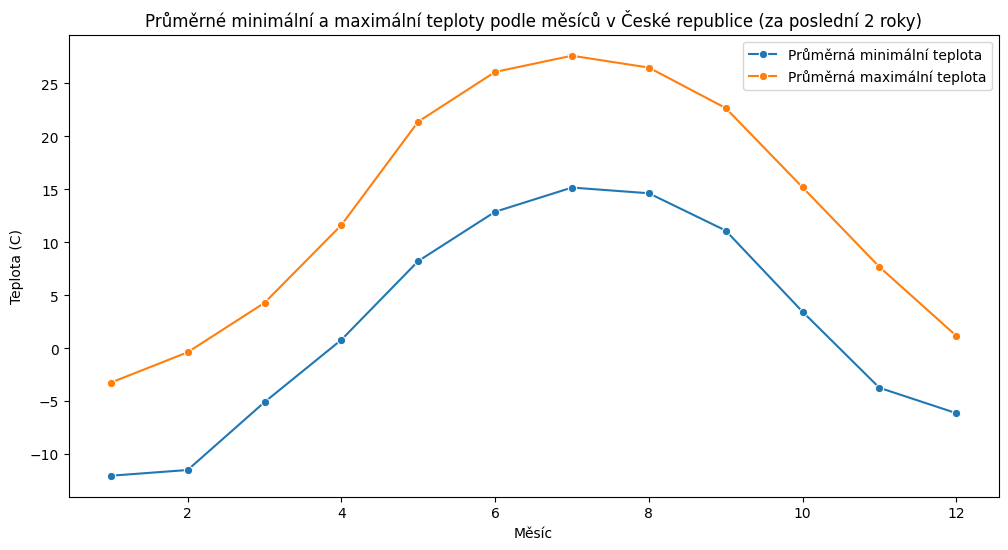

Tato analýza zobrazí vizualizaci změny teploty v České republice v jednotlivých měsících za poslední dva roky, přičemž zobrazí průměrné minimální a maximální hodnoty.


In [6]:
# Vizualizace minimálních a maximálních teplot podle měsíců
plt.figure(figsize=(12, 6))

# Graf minimální teploty
sns.lineplot(x=monthly_min_temp.index, y=monthly_min_temp.values, label='Průměrná minimální teplota', marker='o', dashes=False, linestyle='-')

# Graf maximální teploty
sns.lineplot(x=monthly_max_temp.index, y=monthly_max_temp.values, label='Průměrná maximální teplota', marker='o', dashes=False, linestyle='-')

plt.title('Průměrné minimální a maximální teploty podle měsíců v České republice (za poslední 2 roky)')
plt.xlabel('Měsíc')
plt.ylabel('Teplota (C)')
plt.legend()
plt.show()
print("Tato analýza zobrazí vizualizaci změny teploty v České republice v jednotlivých měsících za poslední dva roky, přičemž zobrazí průměrné minimální a maximální hodnoty.")

In [7]:
# Filtrování dat za poslední 2 roky 
data = data[data['datetime'] >= '2022-01-01']

In [8]:
# Přidání sloupce měsíc pro seskupení
data['Month'] = data['datetime'].dt.month


In [9]:
# Výpočet průměrného úhrnu srážek podle měsíců
monthly_precipitation = data.groupby('Month')['precipcover'].mean()

# Kontrola výsledků výpočtu
print(monthly_precipitation)


Month
1      8.531905
2      7.961786
3     16.465484
4     20.416500
5     12.970806
6      9.861333
7      9.072903
8      9.408226
9     13.680667
10     9.811935
11     6.319500
12     8.467903
Name: precipcover, dtype: float64


AttributeError: Text.set() got an unexpected keyword argument 'marker'

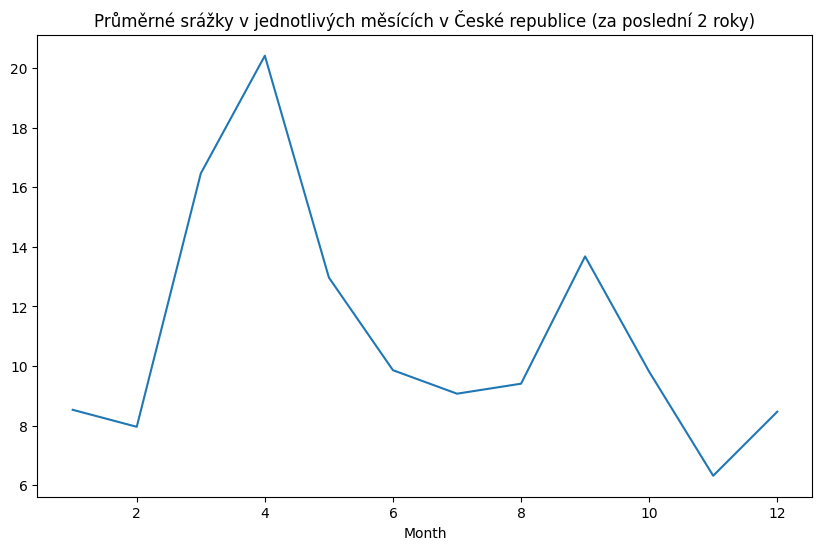

In [10]:
# Vizualizace srážek podle měsíců
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_precipitation.index, y=monthly_precipitation.values, marker='o', dashes=False, linestyle='-')
plt.title('Průměrné srážky v jednotlivých měsících v České republice (za poslední 2 roky)')
plt.xlabel('Měsíc')
plt.ylabel('Srážky (mm)')
plt.show()
print("Tato analýza ukáže, jak se srážky liší v jednotlivých měsících za posledních 2 roky. Budete moci zjistit, ve kterých měsících spadlo nejvíce srážek, a také se podívat na roční výkyvy.")

In [11]:
# Nastavení prahové hodnoty pro extrémně vysokou a nízkou teplotu
extreme_high_temp = 30  # Například teploty nad 30 °C
extreme_low_temp = -10  # Například teploty nižší než -10 °C

In [12]:
# Filtrování dat podle dnů s extrémně vysokými teplotami
extreme_high_days = data[data['tempmax'] > extreme_high_temp]

# Filtrování dat podle dnů s extrémně nízkými teplotami
extreme_low_days = data[data['tempmin'] < extreme_low_temp]

In [13]:
# Počítání počtu dnů s extrémně vysokými a nízkými teplotami
extreme_high_days_count = extreme_high_days['datetime'].dt.year.value_counts().sort_index()
extreme_low_days_count = extreme_low_days['datetime'].dt.year.value_counts().sort_index()


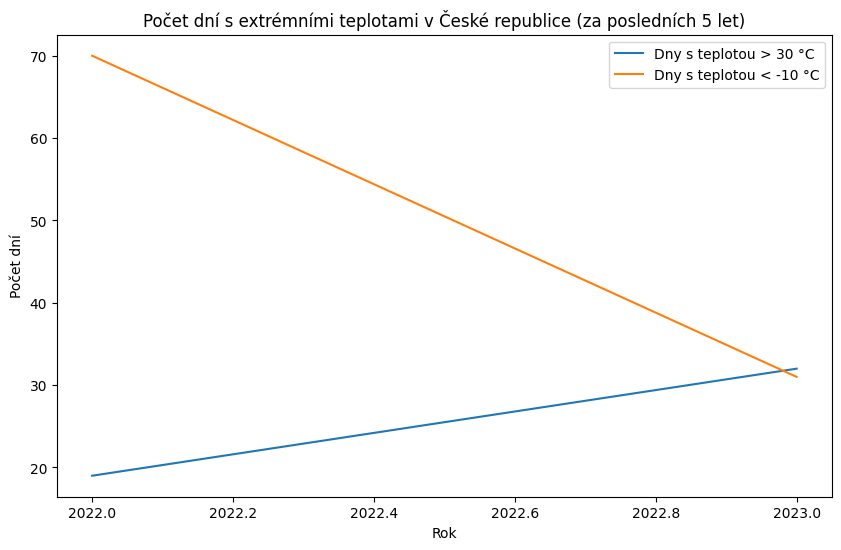

Tato analýza ukáže počet dnů s extrémně nízkými nebo vysokými teplotami. Extrémní teploty lze definovat jako teploty nad > 30 °C nebo pod < -10 °C


In [14]:
# Vizualizace počtu dnů s extrémními teplotami
plt.figure(figsize=(10, 6))
sns.lineplot(x=extreme_high_days_count.index, y=extreme_high_days_count.values, label='Dny s teplotou > 30 °C', marker='o', dashes=False, linestyle='-')
sns.lineplot(x=extreme_low_days_count.index, y=extreme_low_days_count.values, label='Dny s teplotou < -10 °C', marker='o', dashes=False, linestyle='-')
plt.title('Počet dní s extrémními teplotami v České republice (za posledních 5 let)')
plt.xlabel('Rok')
plt.ylabel('Počet dní')
plt.legend()
plt.show()
print("Tato analýza ukáže počet dnů s extrémně nízkými nebo vysokými teplotami. Extrémní teploty lze definovat jako teploty nad > 30 °C nebo pod < -10 °C")